# Lista 07 - Comparando Classificadores

# Exercício 01:

Analise o desempenho do kNN e de uma Regressão Logística Regularizada para **pelo menos um** dos conjuntos de dados abaixo:

* [Avaliação de carros](http://archive.ics.uci.edu/ml/datasets/Car+Evaluation)
* [Avaliação de vinhos](http://archive.ics.uci.edu/ml/datasets/Wine+Quality)
* [Resultados de partidas do jogo Dota](http://archive.ics.uci.edu/ml/datasets/Dota2+Games+Results) (desafiador!)

Para a questão, faça as seguintes tarefas:

* Realize treino, validação e teste
* Compare as métricas no teste
* Reporte a precisão, revocação, F1 e a matriz de confusão

Como já estamos no fim da matéria, você pode agora fazer uso da biblioteca scikit-learn. Afinal, no dia a dia, não implementamos tudo do zero. Abaixo temos os imports que vocês precisam. Leiam a API da biblioteca para saber como fazer uso da mesma.

In [1]:
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support

from sklearn.neighbors import KNeighborsClassifier

# Um fator importante é que o SKLearn não cria conjuntos de validação para você. Você tem algumas abordagens,
# uma é realizar um novo split no treino. Outra é fazer uso de classificadores com CV no fim.
# Tipo LogisticRegressionCV (ver na API). Por fim, você pode fazer uso da classe GridSearchCV.
# Leia a documentação da mesma.
from sklearn.model_selection import train_test_split

In [2]:
#Primeiramente, ler os dados
import pandas as pd

df = pd.read_csv("car.csv")
df.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [3]:
#adicionando nomes para colunas para facilitar a indexacao dos dados
df.columns = ["buying","maint","doors","persons","lug_boot","safety","class"]
#Como a ultima coluna nao apresenta features (acho que eh lixo), a iremos remover
df["ID"] = df.index
df.head()

,buying,maint,doors,persons,lug_boot,safety,class,ID
0,vhigh,vhigh,2,2,small,med,unacc,0
1,vhigh,vhigh,2,2,small,high,unacc,1
2,vhigh,vhigh,2,2,med,low,unacc,2
3,vhigh,vhigh,2,2,med,med,unacc,3
4,vhigh,vhigh,2,2,med,high,unacc,4


In [4]:
# Agora, iremos plotar graficos para representar as distribuicoes dos dados
import matplotlib.pyplot as plt
def plot_dist(data,label,title, threshold=None):
    data[label].unique()
    aux = data[[label,'ID']]
    aux = aux.groupby([label]).count()
    if(threshold):
        aux = aux[aux["ID"]>threshold]
    aux = aux.sort_values('ID')
    plt.title(title)
    plt.bar(aux.index,aux["ID"])
    plt.show()

    
for col in df.columns:
    if(col!="ID"):
        plot_dist(df,col,"Coluna "+str(col))


<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

Os nossos dados são todos categóricos então utilizaremos o Get_dummies para converte-los

In [5]:
import numpy as np
colunas = ["buying","maint","doors","persons","lug_boot","safety"]
classes = ["class"]

tgt = df[classes]
df = df.drop(["class","ID"],axis=1)
df = pd.get_dummies(df, columns=colunas).values
tgt = tgt.values

## K-NN

In [14]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
splits = 5
skf = StratifiedKFold(n_splits=splits, shuffle=True)
X_train, X_test, y_train, y_test = train_test_split(df, tgt, test_size=0.2, random_state=23)

fold = 0
melhores = []
for nn in range(1,11): 
    best = (0, 0)
    accuracy=0
    for treino, validacao in skf.split(X_train, y_train):
        X_tt = X_train[treino]
        y_tt = y_train[treino]
        X_v = X_train[validacao]
        y_v = y_train[validacao]
        y_tt = pd.get_dummies(pd.DataFrame(y_tt)).values
        y_v = pd.get_dummies(pd.DataFrame(y_v)).values

        model = KNeighborsClassifier(n_neighbors=nn)
        model.fit(X_tt, y_tt) 
        y_pv = model.predict(X_v) 

        accuracy += accuracy_score(y_v, y_pv)
    accuracy/=splits
    if accuracy > best[0]:
        best = (accuracy, nn)

    melhores.append(best[1])
    fold += 1
    print('K-{}, Acurácia = {}'.format(fold, best[0]))


K-1, Acurácia = 0.7690069547955474
K-2, Acurácia = 0.6177362944394098
K-3, Acurácia = 0.8132001912559229
K-4, Acurácia = 0.7262261402698741
K-5, Acurácia = 0.8413748467145646
K-6, Acurácia = 0.7856898331513575
K-7, Acurácia = 0.8465025333389853
K-8, Acurácia = 0.7914317117443281
K-9, Acurácia = 0.8580839425605914
K-10, Acurácia = 0.7965595702241108


Temos K = 9 como modelo de melhor acurácia. Iremos replica-lo para testes e métricas

## Métricas - K=9

In [7]:
from sklearn.metrics import classification_report

model = KNeighborsClassifier(n_neighbors=9)
model.fit(X_train, y_train)

print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

         acc       0.81      0.93      0.87        71
        good       0.60      0.30      0.40        10
       unacc       0.98      0.98      0.98       255
       vgood       1.00      0.50      0.67        10

    accuracy                           0.94       346
   macro avg       0.85      0.68      0.73       346
weighted avg       0.94      0.94      0.93       346



c:\users\lucas\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


## Matriz de confusão

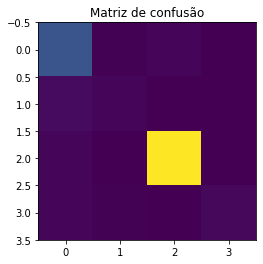

In [8]:
from sklearn.metrics import confusion_matrix
plt.imshow(confusion_matrix(y_test, model.predict(X_test)))
plt.title("Matriz de confusão")
plt.show()

## Regressão Logística 

In [9]:
splits = 9
skf = StratifiedKFold(n_splits=splits, shuffle=True)
X_train, X_test, y_train, y_test = train_test_split(df, tgt, test_size=0.2, random_state=23)

best = (0, 0)
accuracy=0
#Passaremos um dicionário para utilização melhor da biblioteca, vendo os nossos dados são muito 
# simples, podendo não utilizar o LabelEncoder
dct = {'acc':1,'good':2,'unacc':3,'vgood':4}
for treino, validacao in skf.split(X_train, y_train):
    X_tt = X_train[treino]
    y_tt = y_train[treino]
    X_v = X_train[validacao]
    y_v = y_train[validacao]
    y_v = pd.DataFrame(y_v,columns=["data"])
    y_v = y_v.replace({"data": dct})
    y_tt = pd.DataFrame(y_tt,columns=['data'])
    y_tt = y_tt.replace({"data":dct})
    y_tt = y_tt.values
    y_v = y_v.values

    model = LogisticRegression( solver='lbfgs', multi_class='multinomial')
    model.fit(X_tt,np.ravel(y_tt,order='C')) 
    y_pv = model.predict(X_v) 

    accuracy += accuracy_score(np.ravel(y_v,order='C'), y_pv)

accuracy/=splits
if accuracy > best[0]:
    best = (accuracy, nn)

melhores.append(best[1])

print(f'Acuracia = {best[0]}')

Acuracia = 0.9022686957172126


## Métricas e Matriz de confusão

In [10]:
y_test = pd.DataFrame(y_test,columns=['data'])
y_test = y_test.replace({"data":dct})
y_test = y_test.values
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           1       0.78      0.87      0.83        71
           2       0.67      0.60      0.63        10
           3       0.97      0.95      0.96       255
           4       0.89      0.80      0.84        10

    accuracy                           0.92       346
   macro avg       0.83      0.81      0.82       346
weighted avg       0.92      0.92      0.92       346



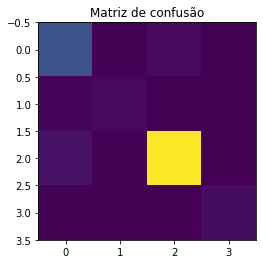

In [11]:
plt.imshow(confusion_matrix(y_test, model.predict(X_test)))
plt.title("Matriz de confusão")
plt.show()

Explique e discuta sobre os resultados encontrados no campo abaixo.

Segundo a matriz de confusão, temos que os dois modelos possuem performace muito semelhante. A partir das métricas vemos que os modelos possuem resultados diferentes dependendo da classe, porém resultados ainda semelhantes com relação a porcentagem de acerto. Mesmo com esses resultados temos acurácias diferentes com a Regressão Logística com melhor desempenho (Regressão - 0.90; KNN - 0.858) 